In [1]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Ejercicio 3
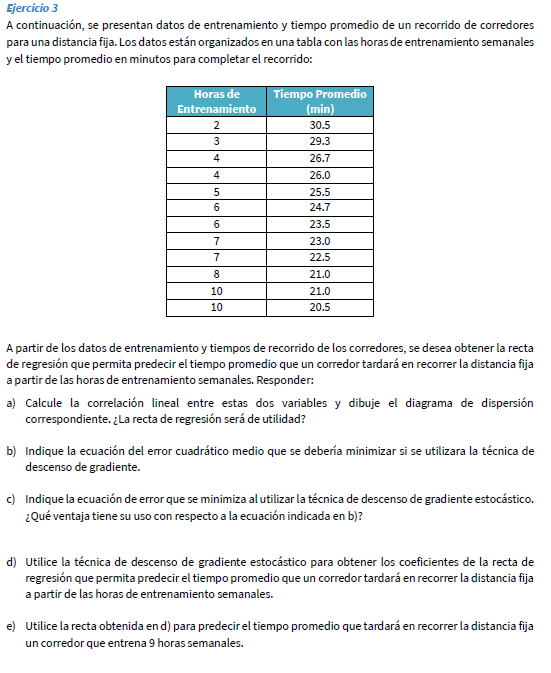


Correlación entre Entrenamiento y Tiempo: -0.9597463860068589



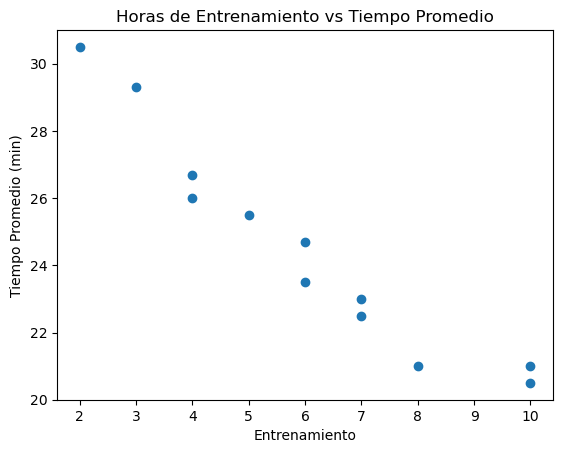

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]) # horas de entrenamiento semanal
Y = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]) # tiempo promedio del recorrido

# Calculo del coeficiente de correlación
correlacion = np.corrcoef(X, Y)[0, 1]
print(f'\nCorrelación entre Entrenamiento y Tiempo: {correlacion}\n')

# Diagrama de dispersión
plt.scatter(X, Y)
plt.xlabel('Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.title('Horas de Entrenamiento vs Tiempo Promedio')
plt.show()


En este caso, nos va a servir una recta de regresion, ya que la forma que nos dan los puntos en este caso estan casi linealmente correlacionados.

La ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente es:

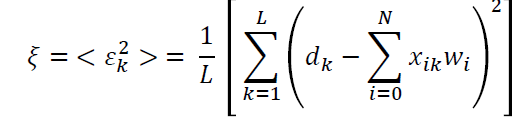

De la cual se calcula el gradiente de esa funcion en un punto en cada iteracion, por lo que es lento, pero preciso

La ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente estocástico es:

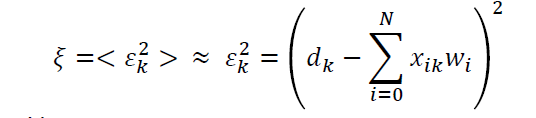

De la cual se calcula el gradiente usando un solo ejemplo a la vez en cada iteracion, por lo que es mas rapido, pero menos preciso


#    Variantes del Descenso del Gradiente
**Descenso del Gradiente por Lotes (Batch Gradient Descent):**

* Calcula el gradiente utilizando todo el conjunto de datos en cada época.
* Ajusta los pesos una vez por época en función del gradiente global promedio.
* Adecuado para conjuntos de datos pequeños o medianos, pero costoso en conjuntos de datos grandes.

**Descenso de Gradiente Estocástico (Stocastic Gradient Descent):**

* Calcula el gradiente utilizando un solo ejemplo a la vez en cada iteración.
* Ajusta los pesos después de cada ejemplo.
* Converge más rápido, especialmente en conjuntos de datos grandes, pero con mayor variabilidad en la dirección del gradiente debido a la estocasticidad.

**Descenso del Gradiente por Mini-lotes (Mini-Batch Gradient Descent):**

* Calcula el gradiente utilizando un mini-lote (un pequeño subconjunto de ejemplos) en cada iteración.
* Ajusta los pesos después de cada mini-lote.
* Equilibra la eficiencia y la estabilidad del gradiente, utilizado comúnmente en prácticas de entrenamiento.

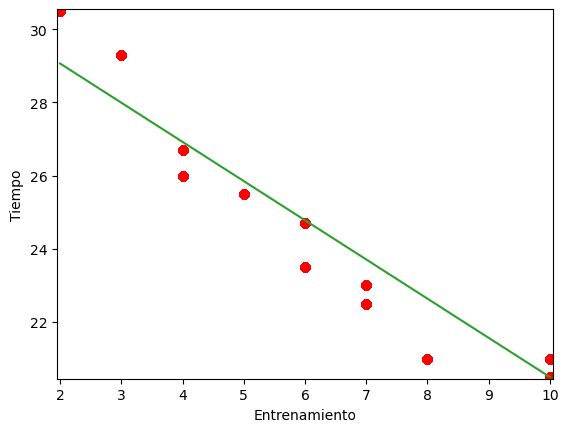

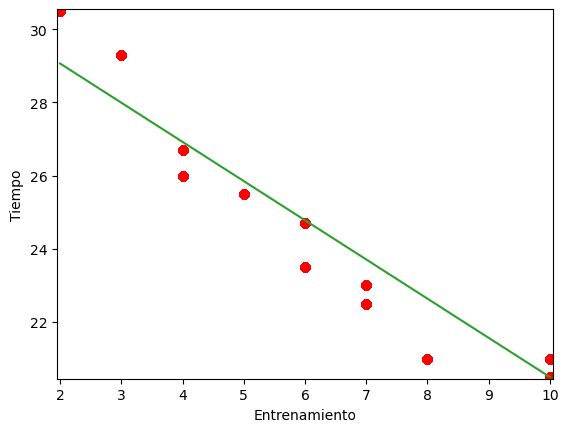

In [3]:
from ClassNeuronaLineal import NeuronaLineal

x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1
print(x_train.shape)

# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=1, title=['Entrenamiento', 'Tiempo'])
modelo = modelo.fit(x_train, y_train)


In [4]:
# imprime pesos
print('Pesos de la Neurona:')
print('  w =', modelo.w_[0])
print('  b =', modelo.b_[0])

Pesos de la Neurona:
  w = -1.0711496862483065
  b = 31.206267032939586


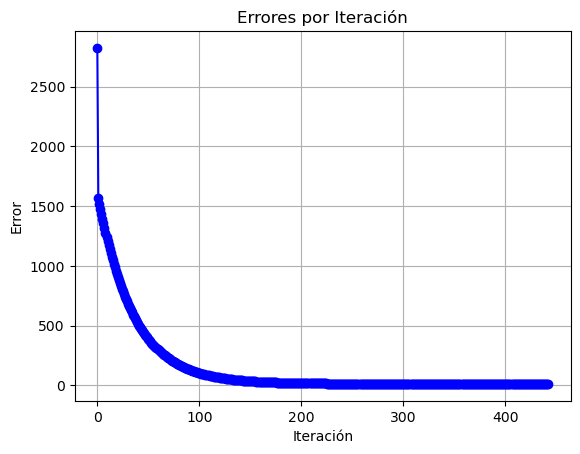

In [5]:
# grafica errores
plt.plot(range(len(modelo.errors_)), [err[0] for err in modelo.errors_], marker='o', linestyle='-', color='b')
plt.title('Errores por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [6]:
predicted_time = modelo.predict([6])

print(predicted_time)

[24.77936892]


In [9]:
hs = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]) # horas de entrenamiento semanal
t = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]) # tiempo promedio del recorrido

def calcular_ecm(W, b, hs, t):
    predicciones = W * hs + b  # Fórmula para predecir PE
    ecm = np.mean((t - predicciones) ** 2)  # Calcular el error cuadrático medio
    return ecm



print(calcular_ecm(-1.1301, 31.2102, hs, t))

print(-1.1301 * 6 + 31.2102)  # Fórmula para predecir PE

0.8037705533333342
24.4296
